<img src="https://i.imgur.com/PcOG8ni.png">

### Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy. Let's see all the features present in the dataset:

* **class**: edible(e) or poisonous(p)
* **cap-shape**: bell(b), conical(c), convex(x), flat(f), knobbed(k), sunken(s)
* **cap-surface**: fibrous(f), grooves(g), scaly(y), smooth(s)
* **cap-color**: brown(n), buff(b), cinnamon(c), gray(g), green(r), pink(p), purple(u), red(e), white(w), yellow(y)
* **bruises**: bruises(t), no bruises(f)
* **odor**: almond(a), anise(l), creosote(c), fishy(y), foul(f), musty(m), none(n), pungent(p), spicy(s)
* **gill-attachment**: attached(a), descending(d), free(f), notched(n)
* **gill-spacing**: close(c), crowded(w), distant(d)
* **gill-size**: broad(b), narrow(n)
* **gill-color**: black(k), brown(n), buff(b), chocolate(h), gray(g), green(r), orange(o), pink(p), purple(u), red(e), white(w), yellow(y)
* **stalk-shape**: enlarging(e), tapering(t)
* **stalk-root**: bulbous(b), club(c), cup(u), equal(e), rhizomorphs(z), rooted(r), missing(?)
* **stalk-surface-above-ring**: fibrous(f), scaly(y), silky(k), smooth(s)
* **stalk-surface-below-ring**: fibrous(f), scaly(y), silky(k), smooth(s)
* **stalk-color-above-ring**: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)
* **stalk-color-below-ring**: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)
* **veil-type**: partial(p), universal(u)
* **veil-color**: brown(n), orange(o), white(w), yellow(y)
* **ring-number**: none(n), one(o), two(t)
* **ring-type**: cobwebby(c), evanescent(e), flaring(f), large(l), none(n), pendant(p), sheathing(s), zone(z)
* **spore-print-color**: black(k), brown(n), buff(b), chocolate(h), green(r), orange(o), purple(u), white(w), yellow(y)
* **population**: abundant(a), clustered(c), numerous(n), scattered(s), several(v), solitary(y)
* **habitat**: grasses(g), leaves(l), meadows(m), paths(p), urban(u), waste(w), woods(d)


## 1) Importing libraries

In [ ]:
import os
import itertools
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# ignore deprecation warnings in sklearn

import warnings
warnings.filterwarnings('ignore')

# Default configurations

plt.style.use('seaborn-pastel')
pd.set_option('display.max_columns', 500)
colPlots = ['skyblue','lightgreen']

print('Libraries imported and default configuration set!')
print('Libraries imported!')

Libraries imported and default configuration set!
Libraries imported!


In [ ]:
def plotBar(df, fig, col, fontS = 9):

    """ Function that draw a tuned bar plot 
    
    Arguments
    ---------
    df:    Pandas DataFrame
    fig:   Figure to tune
    col:   Column of the dataframe to plot
    fontS: Font size of the lables that will be printed above the bars
    
    """
    
    nGroups = tmpDF.shape[0]
    eArr = np.array(tmpDF['e'])
    pArr = np.array(tmpDF['p'])
    index = np.arange(nGroups)
    bar_width = 0.425
    opacity = 0.65
    
    plt.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    bar1 = plt.bar(index, eArr, bar_width, alpha=opacity, color = colPlots[0], label='e')

    for bar in bar1:
        height = bar.get_height()
        if height > 0 :
            plt.gca().text(bar.get_x() + bar.get_width()/2, (bar.get_height()+42), str(int(height)),
                           ha='center', color='black', fontsize=fontS)

    bar2 = plt.bar(index + bar_width, pArr, bar_width, alpha = opacity,color = colPlots[1], label = 'p')

    for bar in bar2:
        height = bar.get_height()
        if height > 0 :
            plt.gca().text(bar.get_x() + bar.get_width()/2, (bar.get_height()+40), str(int(height)),
                           ha='center', color='black', fontsize=fontS)
    b,t = plt.ylim()
    plt.ylim(top=(t*1.10))

    plt.title('Class count per ' + col, fontstretch = 'semi-condensed', fontsize = 16)
    plt.xticks(index + bar_width/2, list(tmpDF.index))
    plt.tight_layout()
   
    return fig


In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, figSize = [8,6], x_rot = 45, normalize=True):
    
    """ given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2], the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
    figSize:     Size of the confusion matrix plot (*)
    x_rot:        Degree of rotation of the X-axis labels (*)
    normalize:    If False, plot the raw numbers, If True, plot the proportions
    
    
    Credit --> https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
    (*)    --> Changes I've included in the function.
    """
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(figSize))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=x_rot)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontweight = 'demibold')
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontweight = 'demibold')


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## 2) Import data

In [ ]:
# Import the dataset into a pandas dataframe from  Google Drive

from google.colab import drive, files
drive.mount('/content/drive/')
file_name = "/content/drive/My Drive/mushrooms.csv"
fullDF = pd.read_csv(file_name)
print('Data imported!')

Mounted at /content/drive/
Data imported!


## 3) Preliminary data visualization and analysis

To begin, let's see the first rows of the dataset, it shape, its statistics, detailed information of the features and finally, check if there're NaN values.

In [ ]:
# Let's see the head of the dataset
fullDF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Check shape and statistics of the dataset
print(fullDF.shape)
fullDF.describe()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Check if there're NaN values

fullDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Let's see the different unique values per column

for col in fullDF.columns:
    print(col, '(',len(fullDF[col].unique()),' values ) -->', fullDF[col].unique())
    if col == 'class':
        intTotal = 1
    elif len(fullDF[col].unique()) > 1:
        intTotal = intTotal*(len(fullDF[col].unique())-1)   

class ( 2  values ) --> ['p' 'e']
cap-shape ( 6  values ) --> ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ( 4  values ) --> ['s' 'y' 'f' 'g']
cap-color ( 10  values ) --> ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ( 2  values ) --> ['t' 'f']
odor ( 9  values ) --> ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ( 2  values ) --> ['f' 'a']
gill-spacing ( 2  values ) --> ['c' 'w']
gill-size ( 2  values ) --> ['n' 'b']
gill-color ( 12  values ) --> ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ( 2  values ) --> ['e' 't']
stalk-root ( 5  values ) --> ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ( 4  values ) --> ['s' 'f' 'k' 'y']
stalk-surface-below-ring ( 4  values ) --> ['s' 'f' 'y' 'k']
stalk-color-above-ring ( 9  values ) --> ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ( 9  values ) --> ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ( 1  values ) --> ['p']
veil-color ( 4  values ) --> ['w' 'n' 'o' 'y']
ring-number ( 3  values ) --> ['o' 't' 'n

First conclusions:
* All the features are categorical.
* No NaN values.
* One feature (*veil-type*) with only one category, we'll drop it, but before we'll use it.


## 4) Exploratory Data analysis & Visualization

First, let's plot the distribution of the target class, to check if it's balanced/unbalanced.

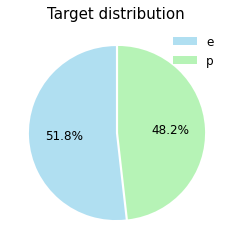

In [ ]:
fullDF.groupby('class').count().iloc[:,0].plot(kind='pie', startangle = 90, textprops={'size': 12},
                                               autopct='%1.1f%%', figsize=(4,4), colors = colPlots,
                                               explode = (0, 0.025), labels = ['',''], wedgeprops={'alpha' : 0.65})
plt.axis('off')
plt.legend(['e','p'],loc=1, frameon=False, fontsize = 12)
plt.title('Target distribution', fontsize = 15)
plt.show()

As we see, the target have a balanced distribution. Now let's plot the features distribution per class (target)

Plot process completed.


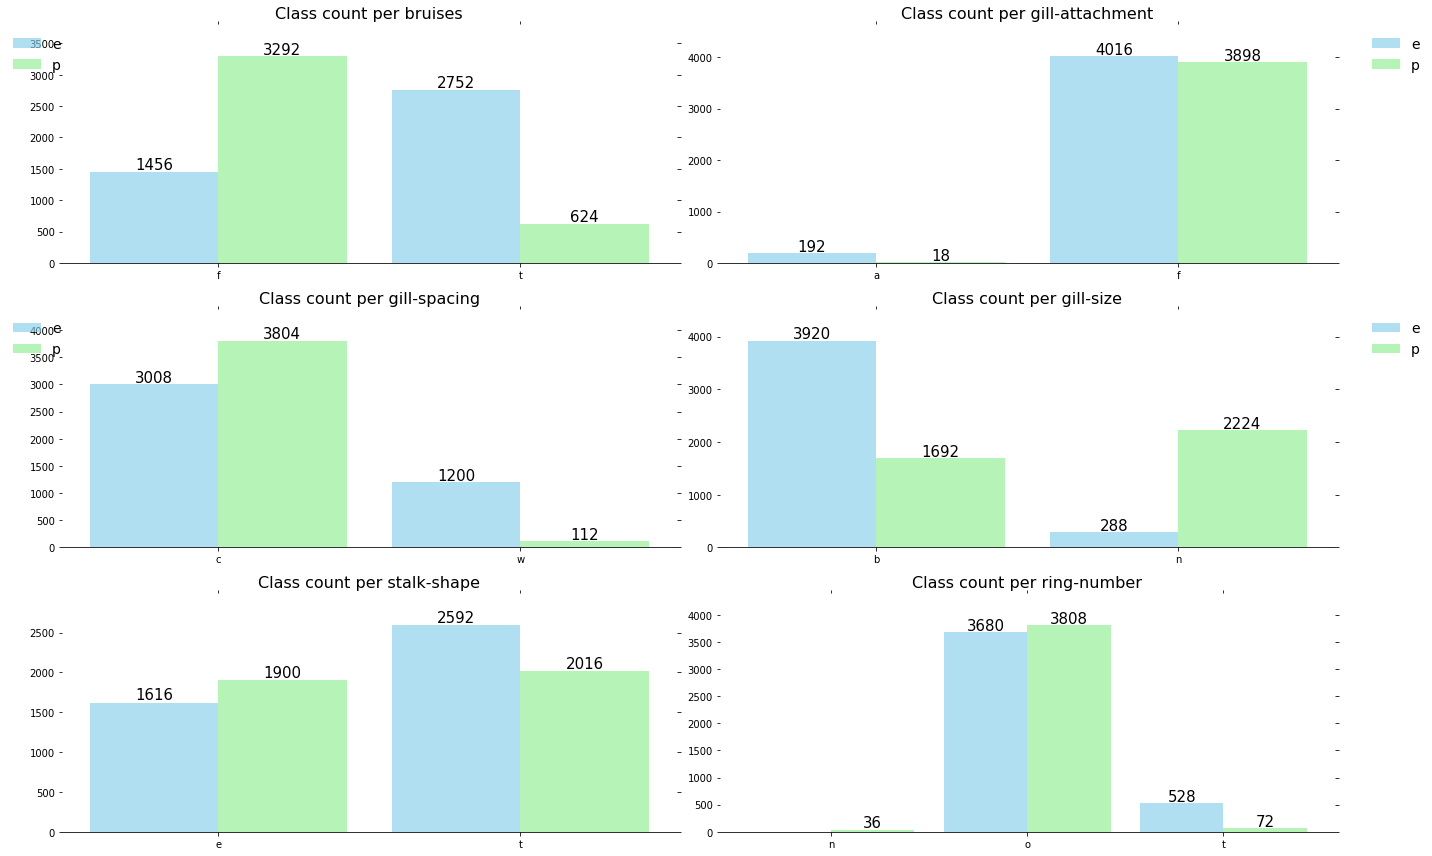

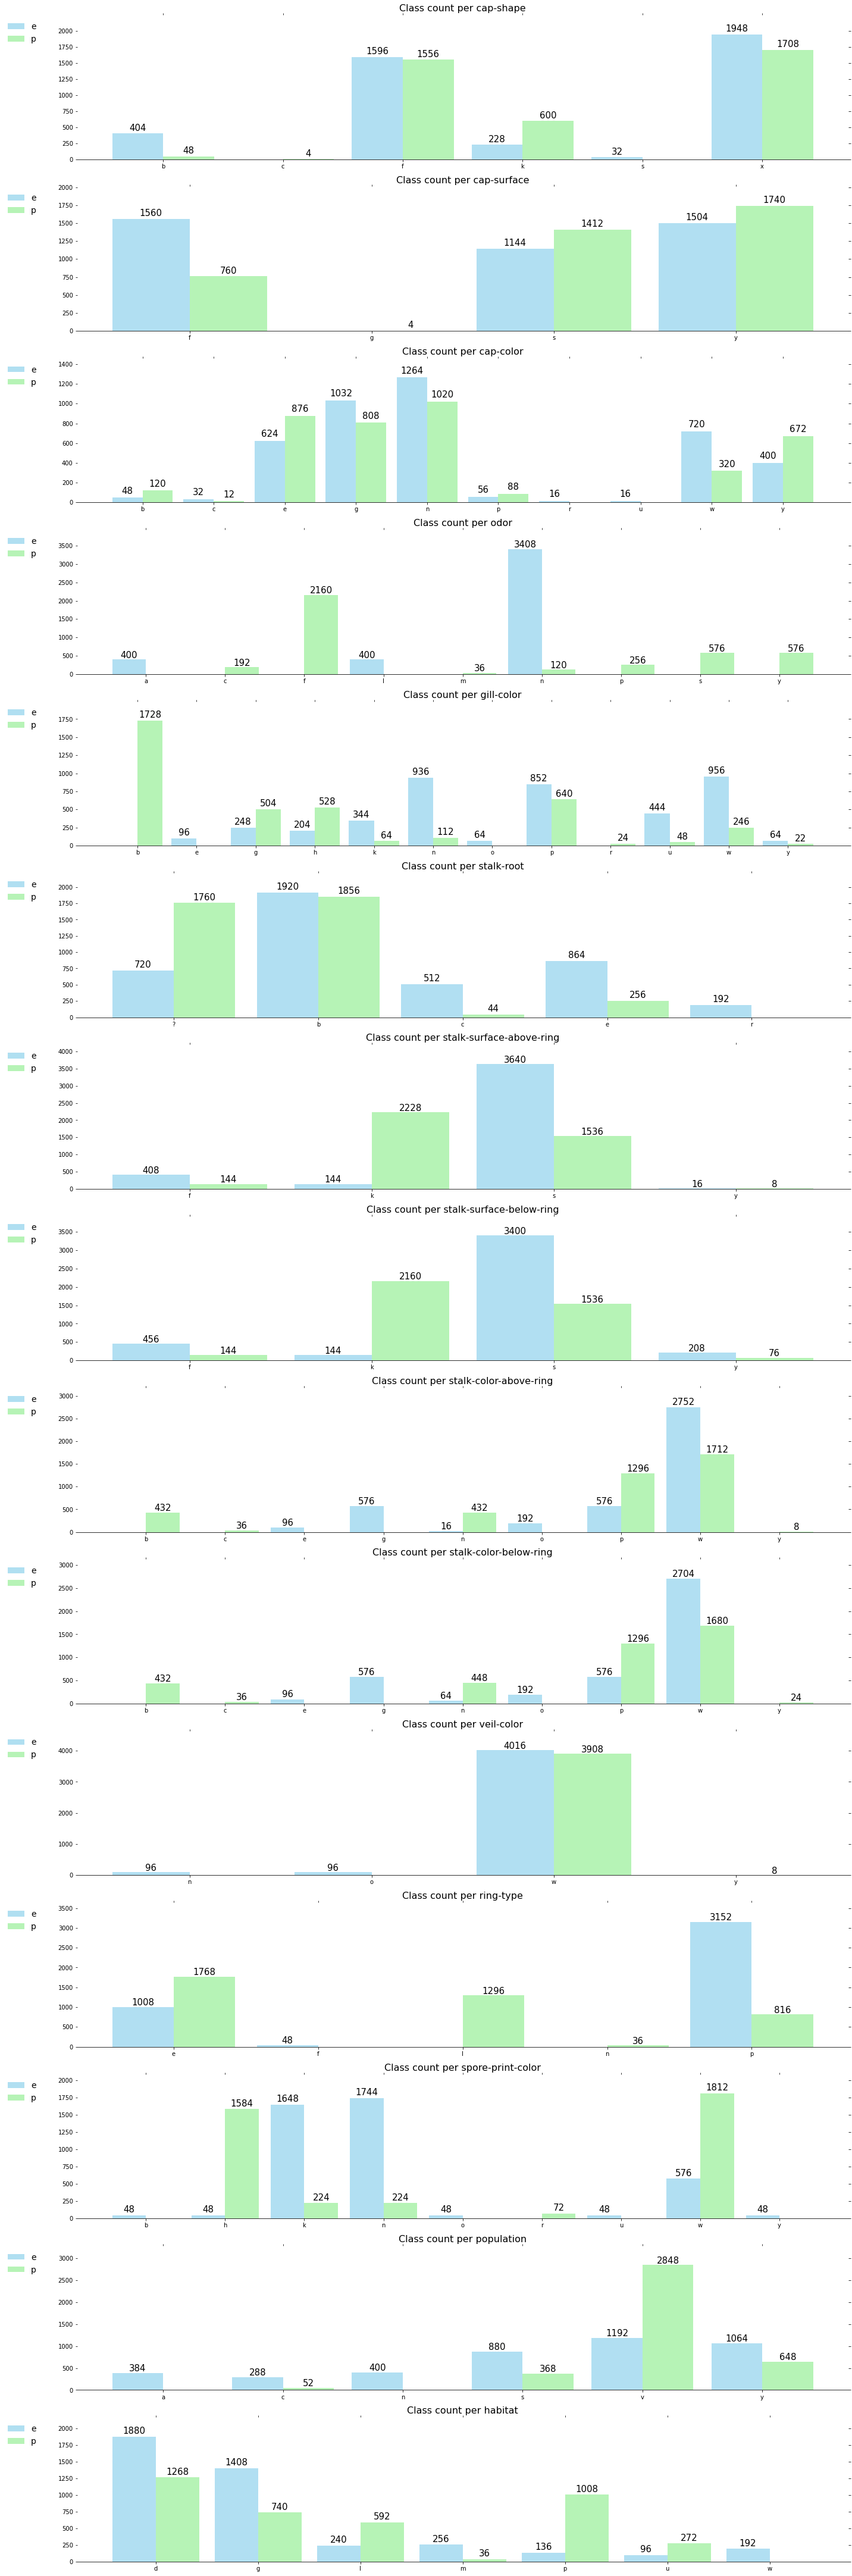

In [ ]:
# Create bar plots

i = 1
fig1 = plt.figure(figsize=(20, 12))

for col in fullDF.columns:
    
    if len(fullDF[col].unique()) <= 3 and col != 'class' and col != 'veil-type' :
        tmpDF = fullDF.groupby([col, 'class']).count()['veil-type'].reset_index()
        tmpDF = tmpDF.pivot(index=col, columns='class', values='veil-type').fillna(0)
        plotBar(tmpDF,fig1.add_subplot(3, 2, i), col, 15)
        if i == 1 or i == 3 :
            plt.legend(frameon=False, bbox_to_anchor=(-0.1,1), loc="upper left", fontsize = 14)
        elif i == 2 or i == 4 : 
            plt.legend(frameon=False, bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 14)
        i += 1
            
i=1
fig2 = plt.figure(figsize=(20,68))

for col in fullDF.columns:
    
    if len(fullDF[col].unique()) > 3 :
        
        tmpDF = fullDF.groupby([col, 'class']).count()['veil-type'].reset_index()
        tmpDF = tmpDF.pivot(index=col, columns='class', values='veil-type').fillna(0)
        plotBar(tmpDF,fig2.add_subplot(17, 1, i), col, 15)
        plt.legend(frameon=False, bbox_to_anchor=(-0.1,1), loc="upper left", fontsize = 14)
        i = i + 1

print('Plot process completed.')

We can draw some conclusions about the features:

   * There're non-informative features like *veil-color*, *gill-attachment* and *ring-number* as the distribution between **e** and **p** is around 50% in the most representative value  
   * There're high-informative features like *odor*, *spore-print-color* and *gill-color* as the distribution of some of their values are above 75-80% for one of the target values.
   

## 5) Feature engineering

First we'll drop the column *veil-type* as it has only one unique value, meaning it doesn't help to the prediction tasks. Then, encode the features with pandas *get_dummies* process, split the dataset in *train* and *test* to be able to train and predict with the classifiers.

In [ ]:
# Drop the column veil-type and encode the target value into a binary variable (0/1)

fullDF['class'] = fullDF['class'].map({'e' : 0, 'p' : 1})
fullDF.drop('veil-type', axis = 1, inplace=True)
fullDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# First, we create the new features with pandas dummies
# Then, split into train and test the dataset.
# Finally we check both the train and test datasets.

fullDF = pd.get_dummies(data=fullDF, drop_first=True)
colFeat = list(fullDF.select_dtypes(include=['int64', 'uint8']).columns)
testDF = fullDF[colFeat]
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class                       8124 non-null   int64
 1   cap-shape_c                 8124 non-null   uint8
 2   cap-shape_f                 8124 non-null   uint8
 3   cap-shape_k                 8124 non-null   uint8
 4   cap-shape_s                 8124 non-null   uint8
 5   cap-shape_x                 8124 non-null   uint8
 6   cap-surface_g               8124 non-null   uint8
 7   cap-surface_s               8124 non-null   uint8
 8   cap-surface_y               8124 non-null   uint8
 9   cap-color_c                 8124 non-null   uint8
 10  cap-color_e                 8124 non-null   uint8
 11  cap-color_g                 8124 non-null   uint8
 12  cap-color_n                 8124 non-null   uint8
 13  cap-color_p                 8124 non-null   uint8
 14  cap-colo

In [ ]:
train, test = train_test_split(testDF, test_size=0.25, random_state=16, stratify=testDF['class'])
train.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
394,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6791,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
5839,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6022,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
6804,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
test.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
4996,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1555,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1852,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2897,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4916,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Sanity check

print('Full dataset shape              -->', fullDF.shape)
print('Train dataset shape             -->', train.shape)
print('Test dataset shape              -->', test.shape)
print('Sum of train and test datasets  --> (',(train.shape[0] + test.shape[0]), ')')

Full dataset shape              --> (8124, 96)
Train dataset shape             --> (6093, 96)
Test dataset shape              --> (2031, 96)
Sum of train and test datasets  --> ( 8124 )


## 6) Model development

# Random Forest Classifier 

In [ ]:
# Hyperparameters lists

criterion_list = ['gini', 'entropy']
max_feature_list = ['auto', 'log2', None]
max_depth_list = np.arange(3,56)

# Create the parameter grid

param_grid = {'max_depth' : max_depth_list, 
              'max_features' : max_feature_list, 
              'criterion' : criterion_list} 

# Create a random search object

randomRF_class = RandomizedSearchCV(estimator = RandomForestClassifier(n_estimators=100, 
                                                                       random_state = 16),
                                    param_distributions = param_grid, n_iter = 100,
                                    scoring='accuracy', cv = 10, return_train_score= True)

# Fit to the training data

randomRF_class.fit(train.drop('class', axis= 1), train['class'])

# Get top-10 results and print them

clf_DF = pd.DataFrame(randomRF_class.cv_results_)
clf_DF = clf_DF.sort_values(by=['rank_test_score']).head(10)

print('Top 10 results (Random Forest - All features)\n')
for index, row in clf_DF.iterrows():
        print('Accuracy score (test): {:.8f} - Parameters: criterion    --> {}'.format(row['mean_test_score'], 
                                                                                       row['param_criterion'])) 
        print('                                                max_features --> {}'.format(row['param_max_features']))
        print('                                                max_depth    --> {}'.format(row['param_max_depth']))

It looks like we don't need to search any further, we have our *perfect classifier*! Now, let's create and fit the classifier with the parameters we got from the *RandomizerSearchCV*, and do some extra checks, scores and compute the log loss metric, to measure our classifier with unseen data.

In [ ]:
# Create the classifier

classRF = RandomForestClassifier(n_estimators=100, random_state = 16, 
                                 max_features = randomRF_class.best_params_['max_features'], 
                                 max_depth = randomRF_class.best_params_['max_depth'], 
                                 criterion = randomRF_class.best_params_['criterion'])

# Fit and predict

classRF.fit(train.drop('class', axis= 1), train['class'])
classRF_Pred = classRF.predict(test.drop('class', axis= 1))
classRF_PP = classRF.predict_proba(test.drop('class', axis= 1))[:,1]

# Create and plot the confusion matrix

confMatrix = confusion_matrix(classRF_Pred, test['class'])
plot_confusion_matrix(confMatrix, ['e','p'], cmap='GnBu', figSize = [6,4], x_rot = 0)

# Compute and print the scores and metrics

print('Accuracy score  --> {:.8f}'.format(accuracy_score(test['class'], classRF_Pred)))
print('Precision score --> {:.8f}'.format(precision_score(test['class'], classRF_Pred)))
print('Recall score    --> {:.8f}'.format(recall_score(test['class'], classRF_Pred)))
print('F1 score        --> {:.8f}'.format(f1_score(test['class'], classRF_Pred)))

# SVM Classifier

In [ ]:
# Hyperparameters lists

kernel_list = ['linear', 'rbf']
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]
gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# Create the parameter grid

param_grid = {'kernel' : kernel_list, 'C' : C_list, 'gamma' : gamma_list} 

# Create a random search object

randomSVM_class = RandomizedSearchCV(estimator = SVC(random_state = 16),
                                     param_distributions = param_grid, n_iter = 25,
                                     scoring='accuracy', cv = 10, 
                                     return_train_score= True)

# Fit to the training data

randomSVM_class.fit(train.drop('class', axis= 1), train['class'])

# Get top-10 results and print them

clf_DF = pd.DataFrame(randomSVM_class.cv_results_)
clf_DF = clf_DF.sort_values(by=['rank_test_score']).head(10)

print('Top 10 results (Random Forest - All features)\n')
for index, row in clf_DF.iterrows():
        print('Accuracy score (test): {:.8f} - Parameters: C        --> {}'.format(row['mean_test_score'], 
                                                                                  row['param_C'])) 
        print('                                                gamma    --> {}'.format(row['param_gamma']))
        print('                                                kernel   --> {}'.format(row['param_kernel']))


In [ ]:
# Create the classifier

classSVC = SVC(kernel = randomSVM_class.best_params_['kernel'], 
               C = randomSVM_class.best_params_['C'], 
               gamma = randomSVM_class.best_params_['gamma'], 
               random_state = 16, 
               probability = True) # to be able to create the predict_proba

# Fit and predict

classSVC.fit(train.drop('class', axis= 1), train['class'])
classSVC_Pred = classSVC.predict(test.drop('class', axis= 1))
classSVC_PP = classSVC.predict_proba(test.drop('class', axis= 1))[:,1]

# Create and plot the confusion matrix

confMatrix = confusion_matrix(classSVC_Pred, test['class'])
plot_confusion_matrix(confMatrix, ['e','p'], cmap='GnBu', figSize = [6,4], x_rot = 0)

# Compute and print the scores and metrics

print('Accuracy score  --> {:.8f}'.format(accuracy_score(test['class'], classSVC_Pred)))
print('Precision score --> {:.8f}'.format(precision_score(test['class'], classSVC_Pred)))
print('Recall score    --> {:.8f}'.format(recall_score(test['class'], classSVC_Pred)))
print('F1 score        --> {:.8f}'.format(f1_score(test['class'], classSVC_Pred)))

# KNN Classifier

In [ ]:
# Create the classifier

classKNN = KNeighborsClassifier(1)
classKNN.fit(train.drop('class', axis= 1), train['class'])
classKNN_Pred = classKNN.predict(test.drop('class', axis= 1))
classKNN_PP = classKNN.predict_proba(test.drop('class', axis= 1))[:,1]

confMatrix = confusion_matrix(classKNN_Pred, test['class'])
plot_confusion_matrix(confMatrix, ['e','p'], cmap='GnBu', figSize = [6,4], x_rot = 0)

# Compute and print the scores and metrics

print('Accuracy score  --> {:.8f}'.format(accuracy_score(test['class'], classKNN_Pred)))
print('Precision score --> {:.8f}'.format(precision_score(test['class'], classKNN_Pred)))
print('Recall score    --> {:.8f}'.format(recall_score(test['class'], classKNN_Pred)))
print('F1 score        --> {:.8f}'.format(f1_score(test['class'], classKNN_Pred)))

# Naive Bayes Classifier

In [ ]:
# Create the classifier

classNB = GaussianNB()
classNB.fit(train.drop('class', axis= 1), train['class'])
classNB_Pred = classNB.predict(test.drop('class', axis= 1))
classNB_PP = classNB.predict_proba(test.drop('class', axis= 1))[:,1]

confMatrix = confusion_matrix(classNB_Pred, test['class'])
plot_confusion_matrix(confMatrix, ['e','p'], cmap='GnBu', figSize = [6,4], x_rot = 0)

# Compute and print the scores and metrics

print('Accuracy score  --> {:.8f}'.format(accuracy_score(test['class'], classNB_Pred)))
print('Precision score --> {:.8f}'.format(precision_score(test['class'], classNB_Pred)))
print('Recall score    --> {:.8f}'.format(recall_score(test['class'], classNB_Pred)))
print('F1 score        --> {:.8f}'.format(f1_score(test['class'], classNB_Pred)))
print('Log Loss error  --> {:.8f}'.format(log_loss(test['class'], classNB_PP)))

### 7) Conclusion

Being a full categorical dataset, with the correct approach on the encoding task, we see that we can create a model that achieve a perfect score on the classification task.